<a href="https://colab.research.google.com/github/lathigamohan/Veracity-Vigilance/blob/main/veracity_vigillence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Uploading a dataset**

In [7]:
from google.colab import files
import os
import zipfile
uploaded = files.upload()
os.makedirs("/root/.kaggle", exist_ok=True)
!cp kaggle.json /root/.kaggle/
os.chmod("/root/.kaggle/kaggle.json", 600)
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset
with zipfile.ZipFile("fake-and-real-news-dataset.zip", "r") as zip_ref:
    zip_ref.extractall("dataset")

print("Files inside 'dataset':", os.listdir("dataset"))


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset
License(s): CC-BY-NC-SA-4.0
  0% 0.00/41.0M [00:00<?, ?B/s]
100% 41.0M/41.0M [00:00<00:00, 1.13GB/s]
Files inside 'dataset': ['Fake.csv', 'True.csv']


# **Label, Combine & Shuffle the Dataset**

In [3]:
import pandas as pd

df_fake = pd.read_csv("dataset/Fake.csv")
df_real = pd.read_csv("dataset/True.csv")

df_fake['label'] = 0
df_real['label'] = 1

df = pd.concat([df_fake, df_real], ignore_index=True)

df = df.sample(frac=1, random_state=42).reset_index(drop=True)

df['text'] = df['title'] + " " + df['text']

df = df[['text', 'label']]
df.head()

,text,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,0
1,Trump drops Steve Bannon from National Securit...,1
2,Puerto Rico expects U.S. to lift Jones Act shi...,1
3,OOPS: Trump Just Accidentally Confirmed He Le...,0
4,Donald Trump heads for Scotland to reopen a go...,1


# **Text Cleaning & Preprocessing**

In [4]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')  # also needed for full lemmatization


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [5]:
import re
import string

def preprocess_text(text):

    text = text.lower()

    text = re.sub(r"http\S+|www\S+", '', text)

    text = re.sub(r'[^a-z\s]', '', text)

    tokens = text.split()

    tokens = [word for word in tokens if len(word) > 2]

    return " ".join(tokens)


In [6]:
df['clean_text'] = df['text'].apply(preprocess_text)
df[['text', 'clean_text', 'label']].head()


,text,clean_text,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,ben stein calls out circuit court committed co...,0
1,Trump drops Steve Bannon from National Securit...,trump drops steve bannon from national securit...,1
2,Puerto Rico expects U.S. to lift Jones Act shi...,puerto rico expects lift jones act shipping re...,1
3,OOPS: Trump Just Accidentally Confirmed He Le...,oops trump just accidentally confirmed leaked ...,0
4,Donald Trump heads for Scotland to reopen a go...,donald trump heads for scotland reopen golf re...,1


# VISUALIZATION DASHBOARD

/tmp/ipython-input-7-4136838474.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette=['#FF6B6B', '#1DD1A1'])


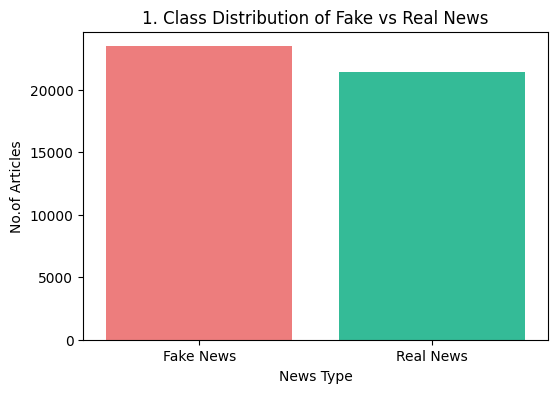

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df, palette=['#FF6B6B', '#1DD1A1'])
plt.xticks([0, 1], ['Fake News', 'Real News'])
plt.title("1. Class Distribution of Fake vs Real News")
plt.xlabel("News Type")
plt.ylabel("No.of Articles")
plt.show()


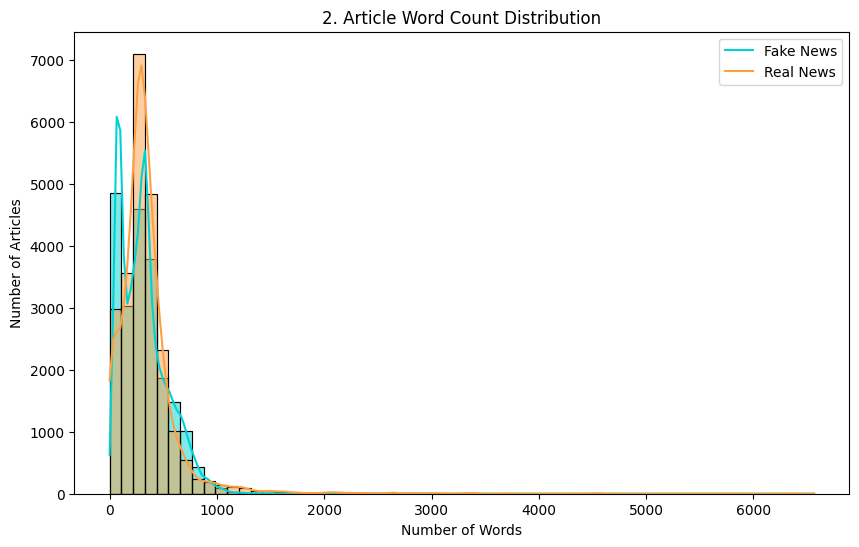

In [8]:
df['text_length'] = df['clean_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', hue='label', bins=60, kde=True, palette=['#ff9f43', '#00d2d3'])
plt.title("2. Article Word Count Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Number of Articles")
plt.legend(labels=['Fake News', 'Real News'])
plt.show()


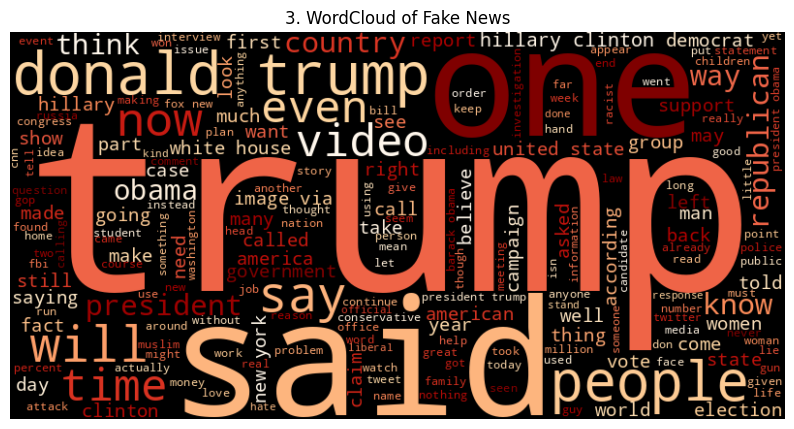

In [9]:
from wordcloud import WordCloud

fake_text = " ".join(df[df['label'] == 0]['clean_text'])

plt.figure(figsize=(10, 6))
wordcloud_fake = WordCloud(width=800, height=400, background_color='black', colormap='OrRd').generate(fake_text)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title("3. WordCloud of Fake News")
plt.show()


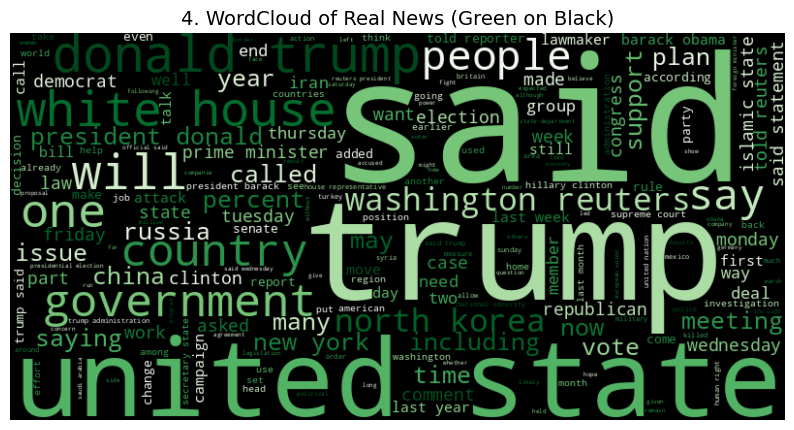

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

real_text = " ".join(df[df['label'] == 1]['clean_text'])

plt.figure(figsize=(10, 6))
wordcloud_real = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='Greens',
    max_words=200
).generate(real_text)

plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis('off')
plt.title("4. WordCloud of Real News (Green on Black)", fontsize=14)
plt.show()


/tmp/ipython-input-37-2055088544.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='Reds_r')


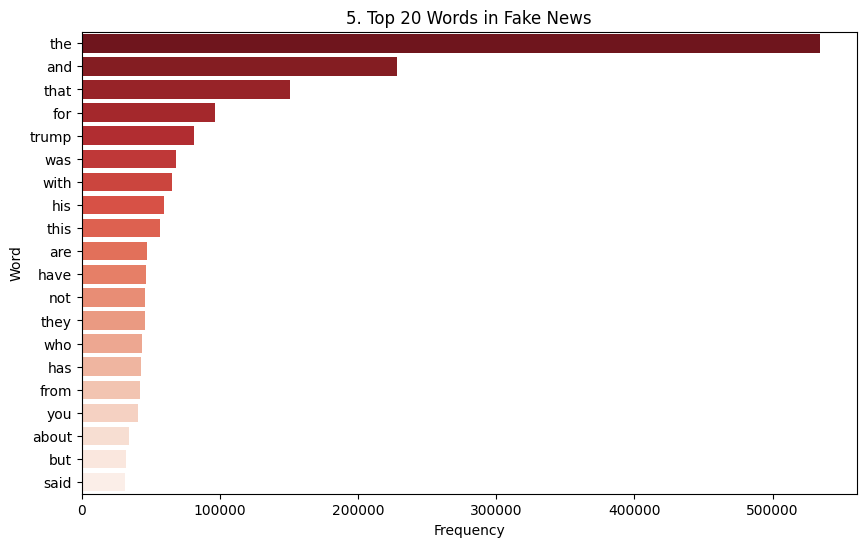

In [ ]:
from collections import Counter

def get_top_n_words(corpus, n=20):
    words = " ".join(corpus).split()
    return Counter(words).most_common(n)

top_fake_words = get_top_n_words(df[df['label'] == 0]['clean_text'], 20)
words, counts = zip(*top_fake_words)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words), palette='Reds_r')
plt.title("5. Top 20 Words in Fake News")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()


/tmp/ipython-input-38-4191566662.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(bigram_labels), palette='Greens_r')


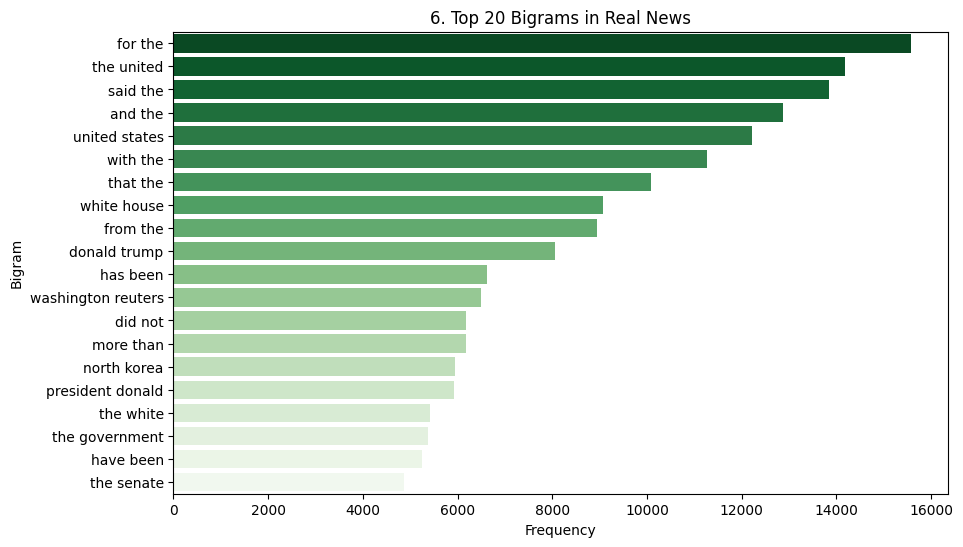

In [ ]:
from nltk.util import ngrams

def get_top_n_bigrams(corpus, n=20):
    bigrams = []
    for text in corpus:
        tokens = text.split()
        bigrams.extend(list(ngrams(tokens, 2)))
    return Counter(bigrams).most_common(n)

top_real_bigrams = get_top_n_bigrams(df[df['label'] == 1]['clean_text'], 20)
bigrams, counts = zip(*top_real_bigrams)
bigram_labels = [' '.join(b) for b in bigrams]

plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(bigram_labels), palette='Greens_r')
plt.title("6. Top 20 Bigrams in Real News")
plt.xlabel("Frequency")
plt.ylabel("Bigram")
plt.show()


/tmp/ipython-input-47-3545541129.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette=['#FF6B6B', '#1DD1A1'], ax=axs[0, 0])
/tmp/ipython-input-47-3545541129.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='label', y='text_length', data=df, palette=['#FF9F43', '#10AC84'], ax=axs[1, 0])
/tmp/ipython-input-47-3545541129.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='ellipses', data=df, palette=['#FF6B6B', '#1DD1A1'], ax=axs[2, 1])
/tmp/ipython-input-47-3545541129.py:60: UserWarning: se

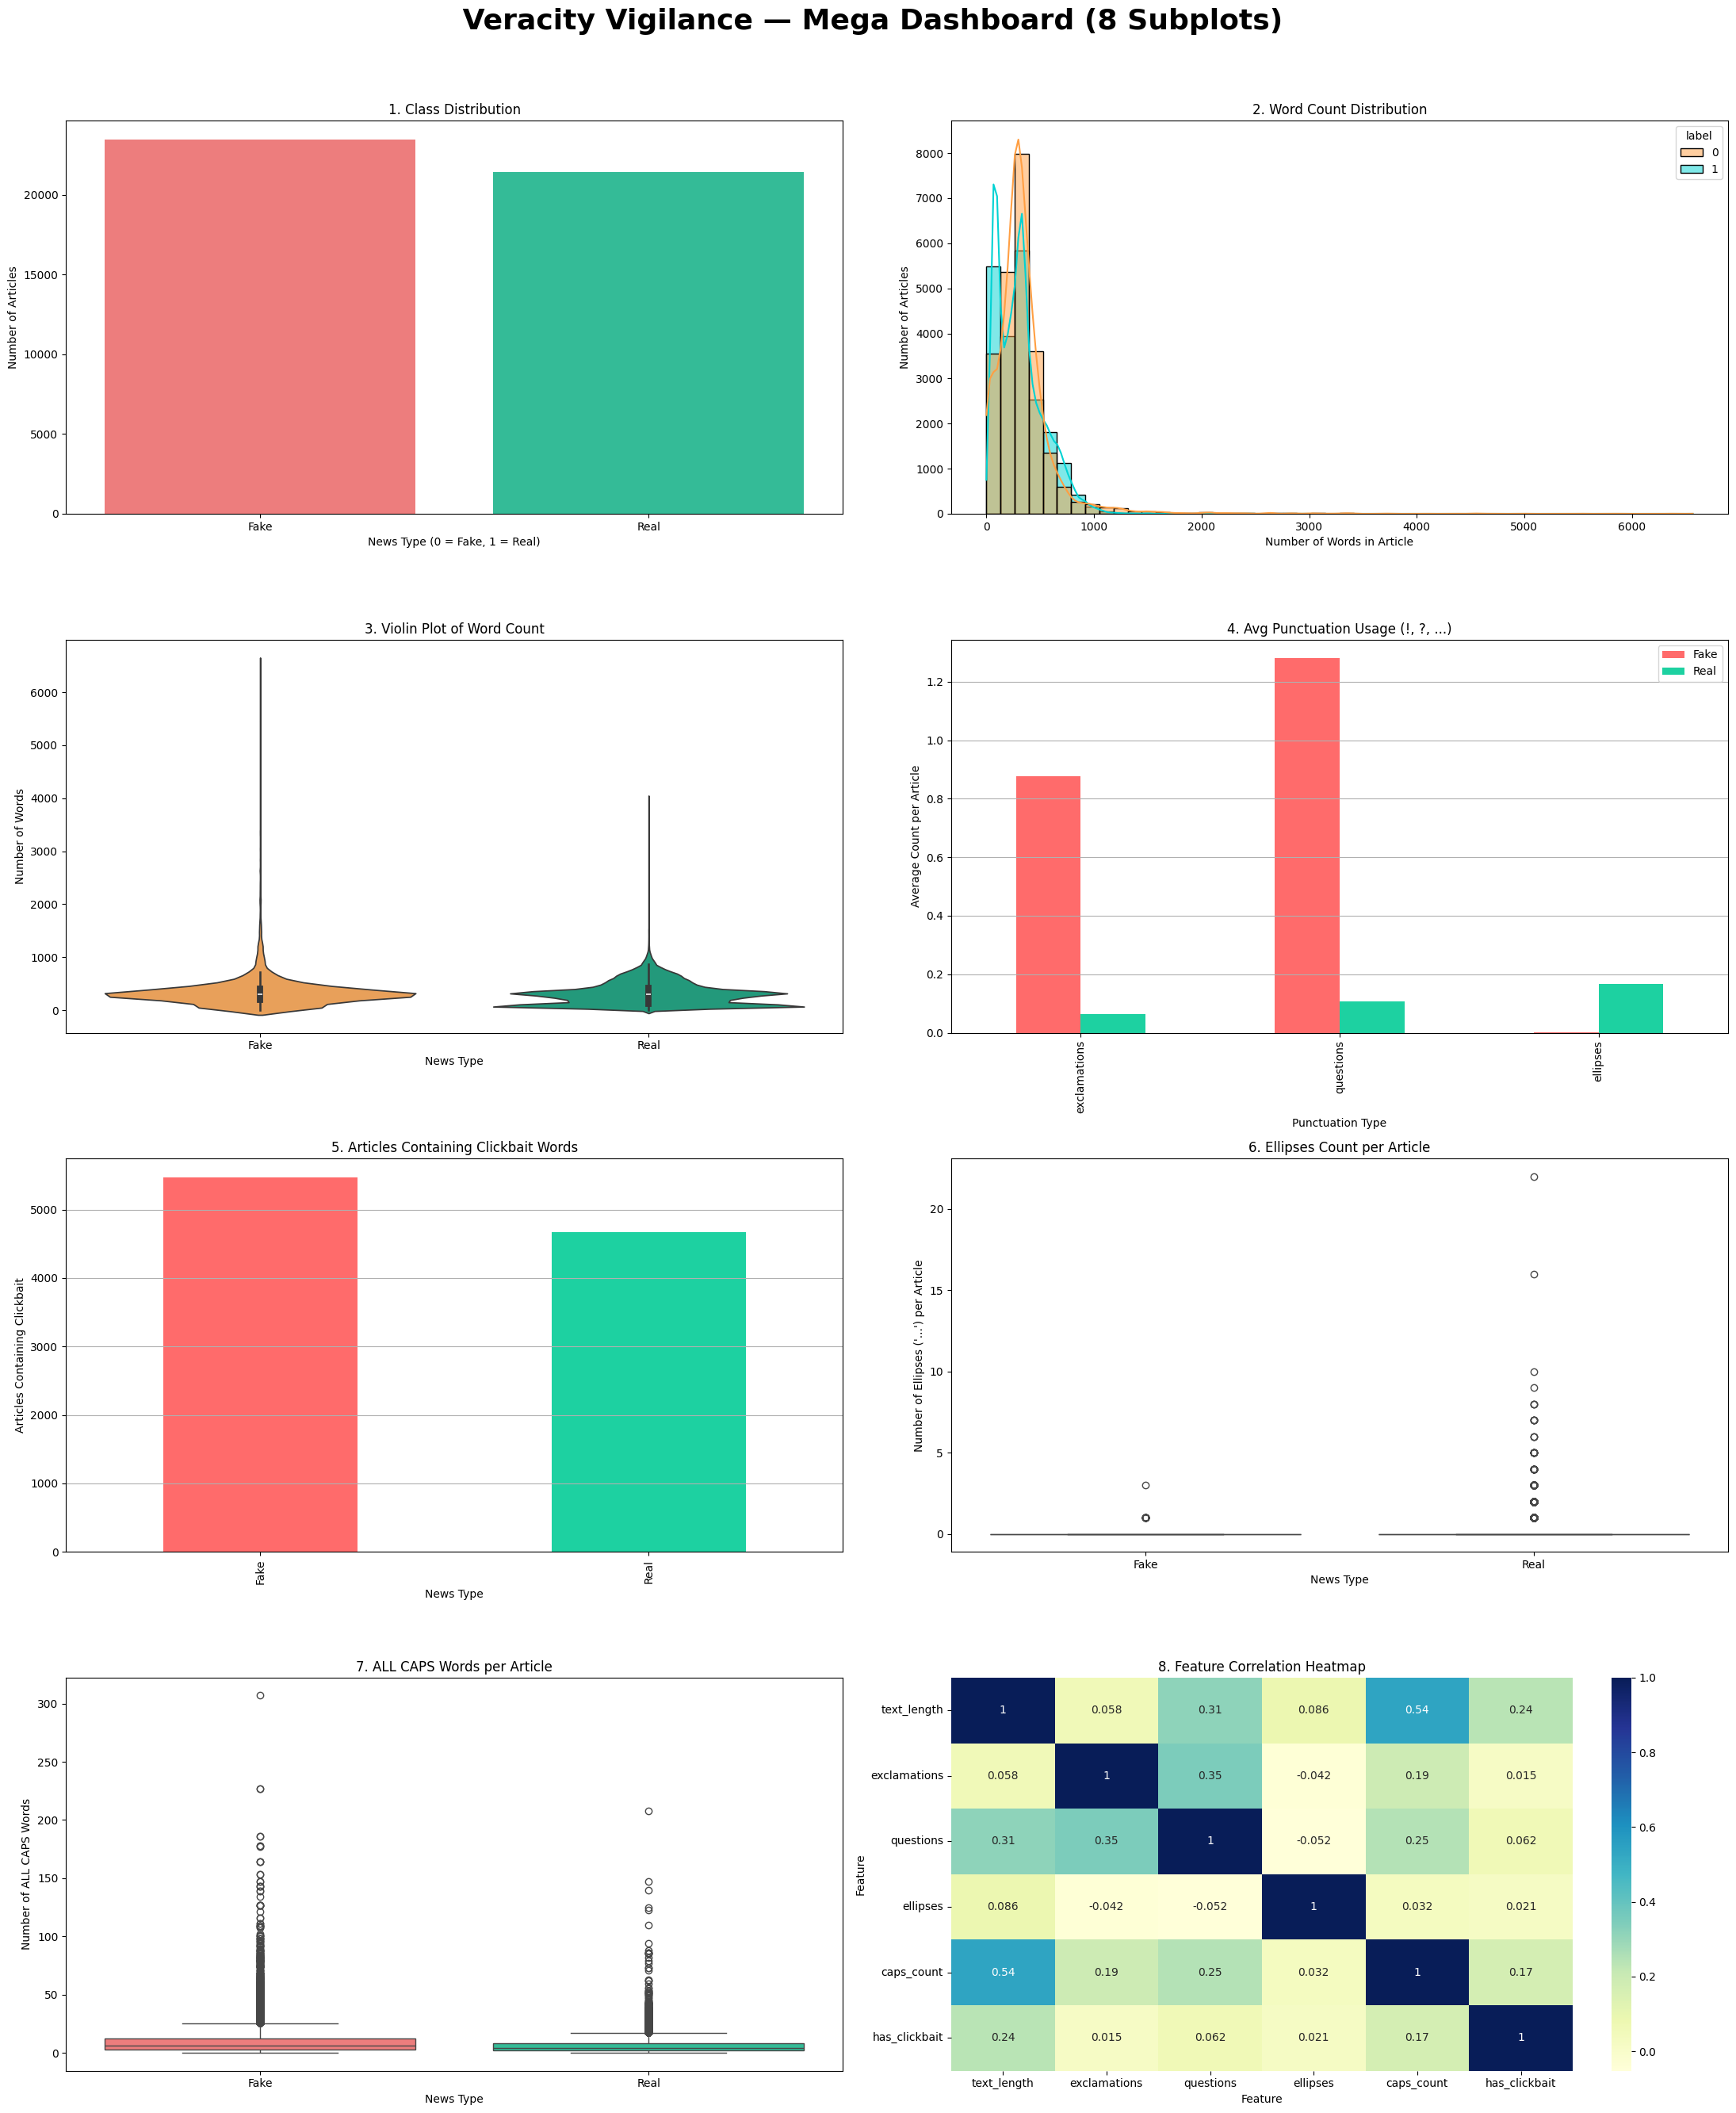

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from nltk.util import ngrams
from collections import Counter


df['text_length'] = df['clean_text'].apply(lambda x: len(x.split()))
df['exclamations'] = df['text'].apply(lambda x: x.count('!'))
df['questions'] = df['text'].apply(lambda x: x.count('?'))
df['ellipses'] = df['text'].apply(lambda x: x.count('...'))

clickbait_words = ['shocking', 'unbelievable', 'you won’t believe', 'secret', 'exposed', 'amazing']
df['has_clickbait'] = df['text'].apply(lambda x: any(cb in x.lower() for cb in clickbait_words))

def count_all_caps(text):
    return sum(1 for word in text.split() if word.isupper() and len(word) > 1)
df['caps_count'] = df['text'].apply(count_all_caps)


fig, axs = plt.subplots(4, 2, figsize=(22, 28))
fig.suptitle(" Veracity Vigilance — Mega Dashboard (8 Subplots)", fontsize=26, weight='bold')

sns.countplot(x='label', data=df, palette=['#FF6B6B', '#1DD1A1'], ax=axs[0, 0])
axs[0, 0].set_xticks([0, 1])
axs[0, 0].set_xticklabels(['Fake', 'Real'])
axs[0, 0].set_xlabel("News Type (0 = Fake, 1 = Real)")
axs[0, 0].set_ylabel("Number of Articles")
axs[0, 0].set_title("1. Class Distribution")

sns.histplot(data=df, x='text_length', hue='label', bins=50, kde=True, palette=['#ff9f43', '#00d2d3'], ax=axs[0, 1])
axs[0, 1].set_title("2. Word Count Distribution")
axs[0, 1].set_xlabel("Number of Words in Article")
axs[0, 1].set_ylabel("Number of Articles")

sns.violinplot(x='label', y='text_length', data=df, palette=['#FF9F43', '#10AC84'], ax=axs[1, 0])
axs[1, 0].set_xticks([0, 1])
axs[1, 0].set_xticklabels(['Fake', 'Real'])
axs[1, 0].set_xlabel("News Type")
axs[1, 0].set_ylabel("Number of Words")
axs[1, 0].set_title("3. Violin Plot of Word Count")

punct_avg = df.groupby('label')[['exclamations', 'questions', 'ellipses']].mean().T
punct_avg.columns = ['Fake', 'Real']
punct_avg.plot(kind='bar', ax=axs[1, 1], color=['#FF6B6B', '#1DD1A1'])
axs[1, 1].set_title("4. Avg Punctuation Usage (!, ?, ...)")
axs[1, 1].set_xlabel("Punctuation Type")
axs[1, 1].set_ylabel("Average Count per Article")
axs[1, 1].grid(axis='y')

clickbait_count = df.groupby('label')['has_clickbait'].sum()
clickbait_count.index = ['Fake', 'Real']
clickbait_count.plot(kind='bar', ax=axs[2, 0], color=['#FF6B6B', '#1DD1A1'])
axs[2, 0].set_title("5. Articles Containing Clickbait Words")
axs[2, 0].set_xlabel("News Type")
axs[2, 0].set_ylabel("Articles Containing Clickbait")
axs[2, 0].grid(axis='y')

sns.boxplot(x='label', y='ellipses', data=df, palette=['#FF6B6B', '#1DD1A1'], ax=axs[2, 1])
axs[2, 1].set_xticklabels(['Fake', 'Real'])
axs[2, 1].set_xlabel("News Type")
axs[2, 1].set_ylabel("Number of Ellipses ('...') per Article")
axs[2, 1].set_title("6. Ellipses Count per Article")

sns.boxplot(x='label', y='caps_count', data=df, palette=['#FF6B6B', '#1DD1A1'], ax=axs[3, 0])
axs[3, 0].set_xticklabels(['Fake', 'Real'])
axs[3, 0].set_xlabel("News Type")
axs[3, 0].set_ylabel("Number of ALL CAPS Words")
axs[3, 0].set_title("7. ALL CAPS Words per Article")

heatmap_data = df[['text_length', 'exclamations', 'questions', 'ellipses', 'caps_count', 'has_clickbait']].copy()
heatmap_data['has_clickbait'] = heatmap_data['has_clickbait'].astype(int)
sns.heatmap(heatmap_data.corr(), annot=True, cmap='YlGnBu', ax=axs[3, 1])
axs[3, 1].set_title("8. Feature Correlation Heatmap")
axs[3, 1].set_xlabel("Feature")
axs[3, 1].set_ylabel("Feature")

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()


# Model Building

TF-IDF Vectorization and Train/Test Split

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_text'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(" TF-IDF done & data is split into train/test sets!")


 TF-IDF done & data is split into train/test sets!


 Accuracy Score: 0.9868596881959911

 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      4710
           1       0.98      0.99      0.99      4270

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



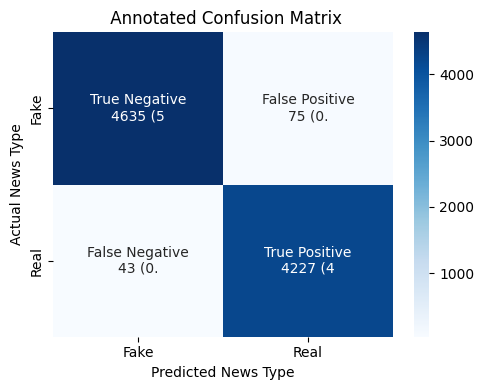

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(" Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
labels = ['Fake', 'Real']

cm_percent = cm / cm.sum() * 100

matrix_labels = np.array([["True Negative", "False Positive"], ["False Negative", "True Positive"]])
annot = np.empty_like(cm).astype(str)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        label = matrix_labels[i, j]
        count = cm[i, j]
        percent = cm_percent[i, j]
        annot[i, j] = f"{label}\n{count} ({percent:.1f}%)"
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=annot, fmt='', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title(" Annotated Confusion Matrix")
plt.xlabel("Predicted News Type")
plt.ylabel("Actual News Type")
plt.tight_layout()
plt.show()


In [13]:
# TF-IDF and train/test split
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_text'])
y = df['label']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    n_estimators=50,
    max_depth=3,
    verbosity=0
)

xgb.fit(X_train, y_train)
print("XGBoost model trained!")


XGBoost model trained!


<Figure size 1000x600 with 0 Axes>

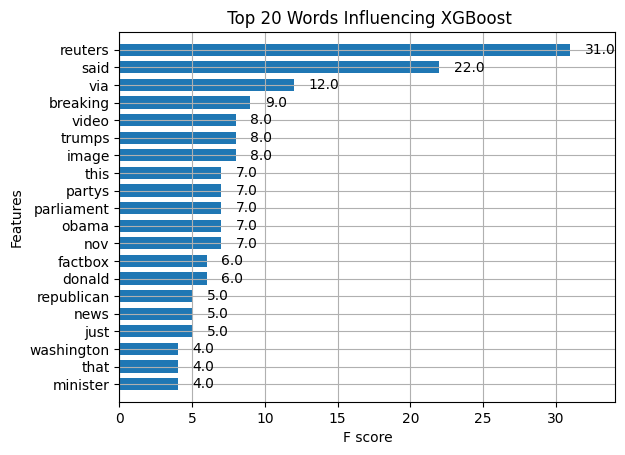

In [16]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

feature_names = tfidf.get_feature_names_out().tolist()

booster = xgb.get_booster()
booster.feature_names = feature_names

plt.figure(figsize=(10, 6))
plot_importance(booster, max_num_features=20, height=0.7)
plt.title(" Top 20 Words Influencing XGBoost")
plt.show()


 Paste your news article below:
Scientists Warn: Rare Frog Flu Can Turn Humans Green During Monsoon

 Model Prediction:
This article appears to be: FAKE NEWS 


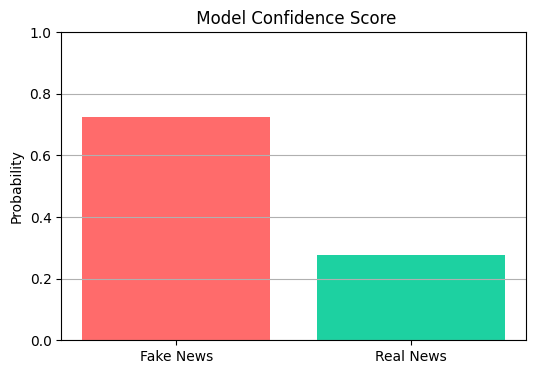

In [19]:
import matplotlib.pyplot as plt
import re

import joblib
model = joblib.load("fake_news_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")

def analyze_news(news_text):
    def clean_text(text):
        text = text.lower()
        text = re.sub(r"http\S+|www\S+", '', text)
        text = re.sub(r'[^a-z\s]', '', text)
        text = " ".join([word for word in text.split() if len(word) > 2])
        return text

    cleaned = clean_text(news_text)
    vector = vectorizer.transform([cleaned])

    prediction = model.predict(vector)[0]
    proba = model.predict_proba(vector)[0]

    print("\n Model Prediction:")
    if prediction == 1:
        print("This article appears to be: REAL NEWS ")
    else:
        print("This article appears to be: FAKE NEWS ")

    labels = ['Fake News', 'Real News']
    plt.figure(figsize=(6, 4))
    plt.bar(labels, proba, color=['#ff6b6b', '#1dd1a1'])
    plt.ylim(0, 1)
    plt.title(" Model Confidence Score")
    plt.ylabel("Probability")
    plt.grid(axis='y')
    plt.show()

user_input = input(" Paste your news article below:\n")
analyze_news(user_input)
